# CS 458 Data Mining Project 1
Kayla Garin
Fall 2020

# Question 1A
Generate 1000 pointsfollowing a uniform distributionunder a given dimension, and then compute difference between max and min distance between any pair of points.

In [3]:
#
# Kayla Garin
# CS 458 P1-1A

import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.spatial.distance import pdist
%matplotlib inline

yval = []

x = np.random.rand(1000, 1) #randomly generated points 
y = pdist(x, 'euclidean') #create array of distances b/w pairs of points
min_dist = min(y) #find min dist
max_dist = max(y) #find max dist
yval.append(np.log10((max_dist - min_dist) / min_dist)) 

print(yval)

[6.717677190873701]


# Question 1B
Repeat (a) for different dimensions from 2 to 50.Plot log10(max−min)/min under different number of dimensions. 

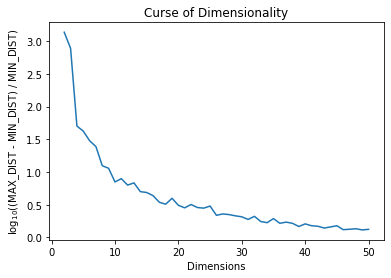

In [1]:
#
# Kayla Garin
#CS 458 P1-1B

import numpy as np
import pandas as pd
from pandas import DataFrame
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

xval = list(range(2, 51)) # array for dimensions 
yval = [] #array to store distances

for i in range(2, 51):
    x = np.random.rand(1000, i) #randomly generated points 
    y = pdist(x, 'euclidean') #create array of distances b/w pairs of points
    min_dist = min(y) #find min dist
    max_dist = max(y) #find max dist
    yval.append(np.log10((max_dist - min_dist) / min_dist)) 

plotvals = pd.Series(yval, index = xval) #create one dimensional array 
plotvals.plot(kind='line', title='Curse of Dimensionality')
plt.xlabel('Dimensions') 
plt.ylabel('log$_1$$_0$((MAX_DIST - MIN_DIST) / MIN_DIST)')
plt.show()

# Question 2A
Recreate given scatter plot on iris dataset

In [ ]:
#
# Kayla Garin
# CS 458 P1-2A

from sklearn.datasets import load_iris
from numpy import array
from pandas import DataFrame
import numpy as np
import pandas as pd


iris = load_iris() # Load Iris data
df = DataFrame(iris.data, columns=iris.feature_names) #create two dimensional tabular data
colors=array(50*['r']+50*['g']+50*['b']) #set custom colors
pd.plotting.scatter_matrix(df, figsize=(10,10), color=colors, diagonal = None) #create scatter plot and display

plt.show()

# Question 2B
Find the best discretization for the petal lengthand the petal widththat can best separate the Iris data and plot a figure similar to the figure in slide 54 in Chapter 2. For each flower type, list in a table how many data samples are correctly separated and how many are not correctly separated.

In [ ]:
#
#Kayla Garin
#P1-2 B

from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

#Load Iris data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

MarkerStyle = ['s', 'o', 'D'] #create array for custom marker style 
species = ['Setosa', 'Versicolor', 'Virginica'] 

for i in range(0, 3):    #for loop to iterate through species
    species_df = iris_df[iris_df['species'] == i]    
  
    plt.scatter( 
        species_df['petal width (cm)'], #x axis data     
        species_df['petal length (cm)'], #y axis data
        marker=MarkerStyle[i], #load custom markers
        alpha=0.5,  #scalar to easily identify individual points (changes opacity)   
        label=species[i] #Match data to label for legend   
    )

plt.xlabel('Petal Width (cm)') #Set X axis label
plt.ylabel('Petal Length (cm)') #Set Y axis label
plt.title('Discretization: Iris Example') #Set Title
plt.legend(loc='lower right') #Set Legend Location

plt.show()

# Question 3A
Use the Iris dataset and plot all the samples in a figure using Sepal Length and Sepal Width, i.e., xlabel('Sepal length') and ylabel('Sepal width'). 

In [ ]:
#
#Kayla Garin
#CS 458 P1-3A

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Load Iris Data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df['species'] = iris['target']

MarkerStyle = ['s', 'o', 'D'] #create array for marker style 
species = ['Setosa', 'Versicolor', 'Virginica']

for i in range(0, 3):    
    species_df = iris_df[iris_df['species'] == i]    
  
    plt.scatter( 
        species_df['sepal length (cm)'], #x axis data     
        species_df['sepal width (cm)'], #y axis data
        marker=MarkerStyle[i], #load custom markerds
        alpha=0.5,  #scalar to easily identify individual points (changes opacity)   
        label=species[i] #Match data to label for legend   
    )

plt.xlabel('sepal length (cm)') #Set X axis label
plt.ylabel('sepal width (cm)') #Set Y axis label
plt.title('Sepal Length x Sepal Width') #Set Title
plt.legend(loc='lower right') #Set Legend Location

plt.show()


# Question 3B
The Iris dataset has 4 attributes (sepal length, sepal width, petal length,and petal width). Use PCA to reduce the dimension of the dataset from 4 to 2. Plot all the samples after the dimensionality reduction in a 2D figure. Compare this figure with the figure in (a) and discuss whether you can better separate the data samples after the dimensionality reduction.

In [ ]:
#
#Kayla Garin
#CS 458 P1-3B

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

#Load Iris data 
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X_r = pca.fit(X).transform(X) #fit model with x

MarkerStyle = ['s', 'o', 'D'] #create array for marker style 
for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names): #for loop to itterate through each species
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], marker=MarkerStyle[i], alpha=0.5,
                label=target_name)

plt.title('PCA of Iris dataset')
plt.legend(loc='lower right')
plt.show()